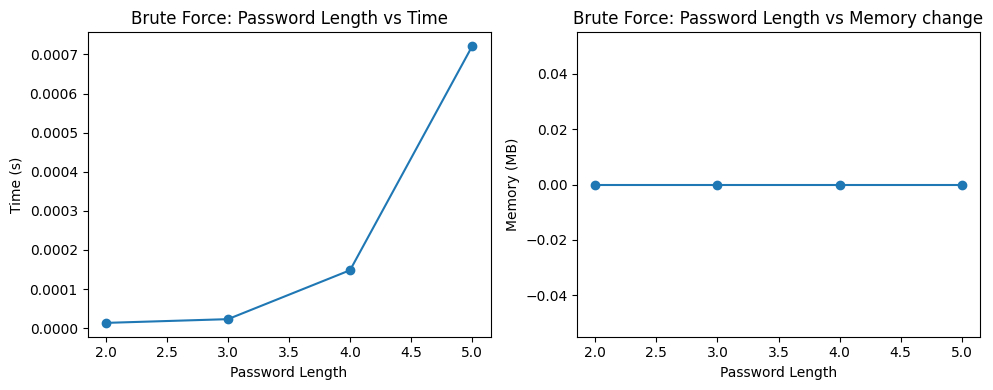

Target: ab1 Found: ab1 Attempts: 52

Note: Time complexity ~ O(c^L) where c=|charset|, L=password length (exponential).


In [8]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

def brute_force_password(target, charset):
    attempts = 0
    for length in range(1, len(target)+1):
        for combo in itertools.product(charset, repeat=length):
            attempts += 1
            if ''.join(combo) == target:
                return ''.join(combo), attempts
    return None, attempts

def profile_bruteforce(lengths=[2,3,4,5], charset='abc123'):
    times = []; mems = []
    for L in lengths:
        target = ''.join(np.random.choice(list(charset), size=L))
        _, t, m = measure_time_and_memory(brute_force_password, args=(target, charset))
        times.append(t); mems.append(m)
    return lengths, times, mems

# Run profiling and plot
lengths, times, mems = profile_bruteforce()
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(lengths, times, marker='o')
plt.title("Brute Force: Password Length vs Time")
plt.xlabel("Password Length"); plt.ylabel("Time (s)")
plt.subplot(1,2,2)
plt.plot(lengths, mems, marker='o')
plt.title("Brute Force: Password Length vs Memory change")
plt.xlabel("Password Length"); plt.ylabel("Memory (MB)")
plt.tight_layout(); plt.show()

# Example run
target = "ab1"
found, attempts = brute_force_password(target, "abc123")
print("Target:", target, "Found:", found, "Attempts:", attempts)
print("\nNote: Time complexity ~ O(c^L) where c=|charset|, L=password length (exponential).")
